 OBJECTIVE OF ANALIYSIS
 
To understand how the student performance is effected by other variables like (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course). 
 

What to do in  Exploratory Data Analysis:

 To Analyse insights in the dataset
 
 To understand the connection between the variables and to uncover the underlying structure.
 
 To extract the import Variables.
 
 To detect anomalies.
 
 To test the underlying assumptions.


In [1]:
import numpy as np
import pandas as pd #data processing,csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns

import os
    
    

In [2]:
df=pd.read_csv(r'C:\Users\RBSK 2\Downloads\StudentsPerformance.csv')
print(df)



     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [3]:
df.info() #all the column name listed and types of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


we have 2 types of variables-

1.numerical variables

2.categorical variables-variables that can take limited and usually fixed values or other unit of observation to a particular group.

here in this data set:

numerical variables are maths score,writing score,reading score

categorical variables are gender,race/ethinicity,lunch,parental level of education,test preparation course



In [4]:
df.describe() #numerical values

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.shape #1000 rows and 8 columns

(1000, 8)

In [6]:
df.isnull().sum() #if any missing value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 now let us plot the graphs between scores in math,reading and writing and no. of students 

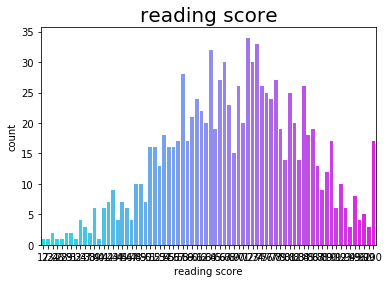

In [7]:
sns.countplot(df['reading score'],palette = 'cool')  #naming the x-axis
plt.rcParams['figure.figsize'] =(20,20) #naming y-axis
plt.title('reading score', fontsize=20) 
plt.show()

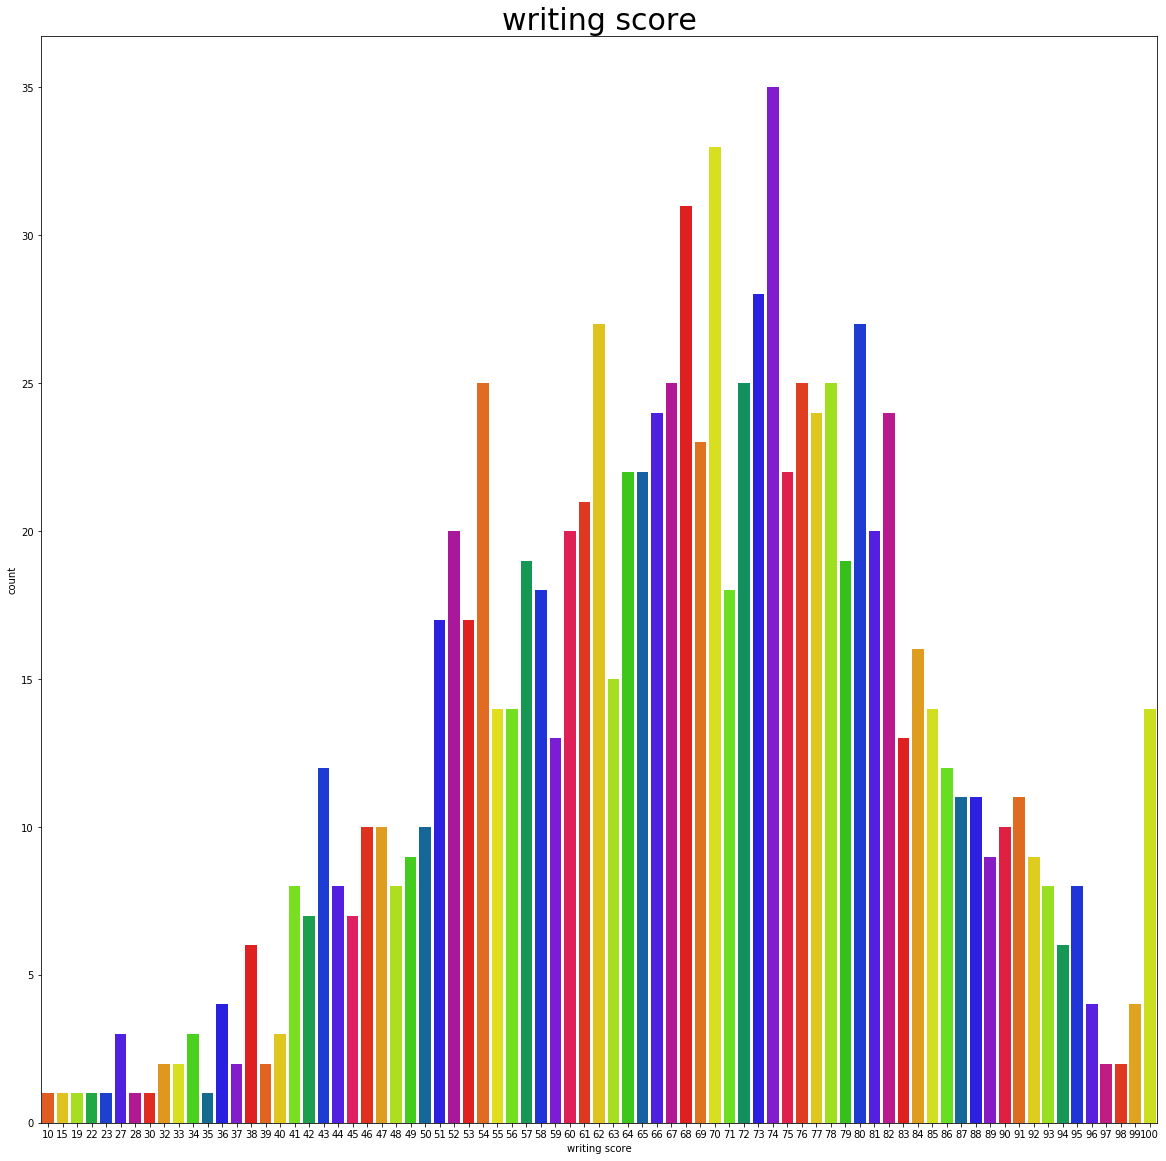

In [8]:
sns.countplot(df['writing score'],palette = 'prism')  #naming the x-axis
plt.rcParams['figure.figsize'] =(20,20) #naming y-axis
plt.title('writing score', fontsize=30) 
plt.show()

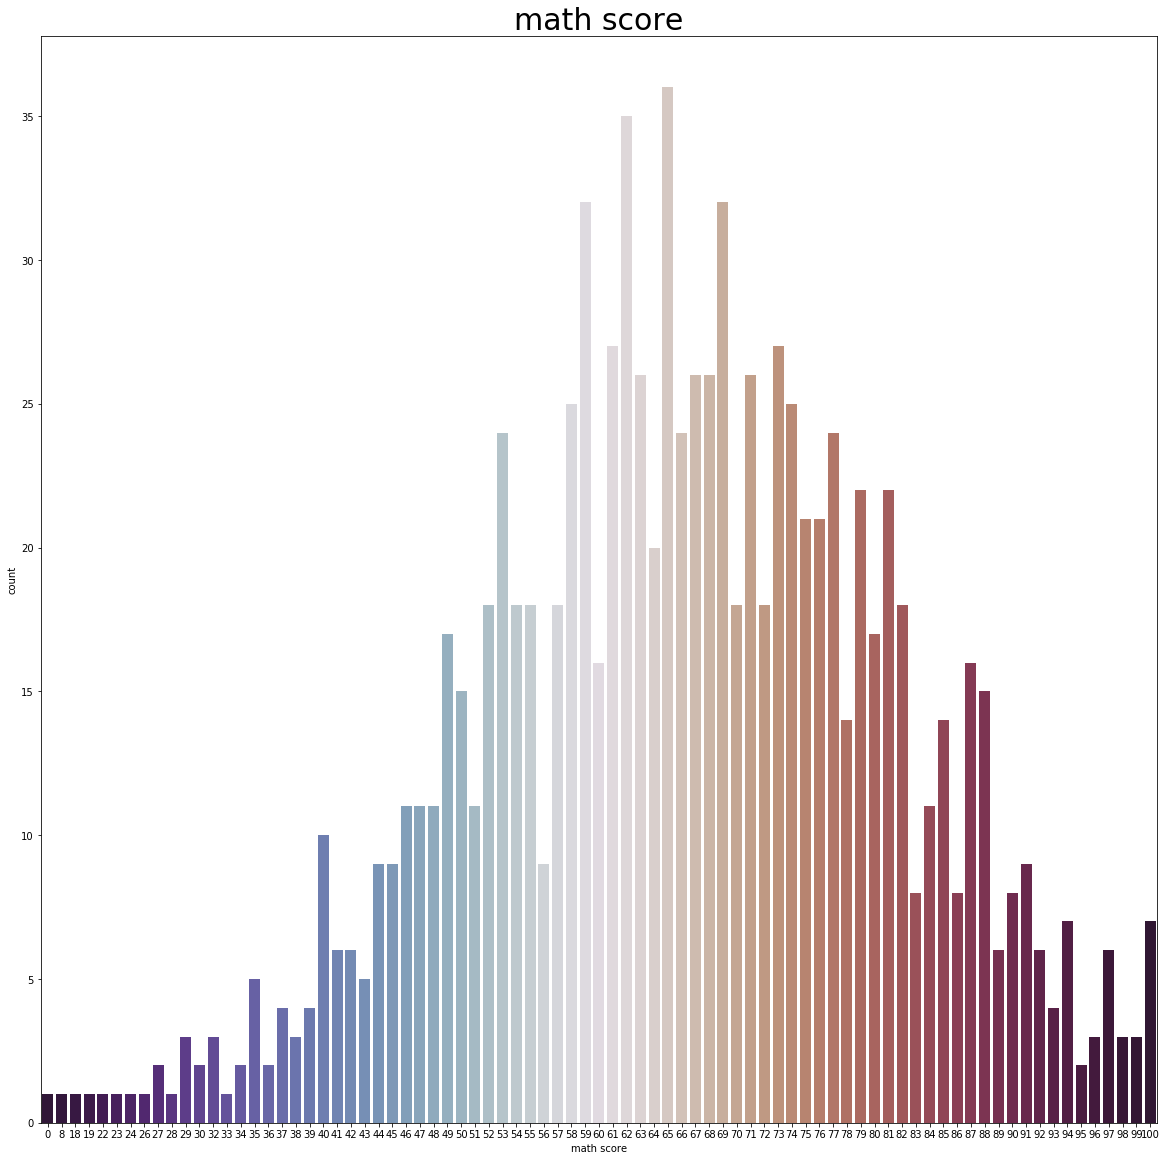

In [9]:
sns.countplot(df['math score'],palette = 'twilight_shifted')  #naming the x-axis
plt.rcParams['figure.figsize'] =(20,30) #naming y-axis
plt.title('math score', fontsize=30) 
plt.show()

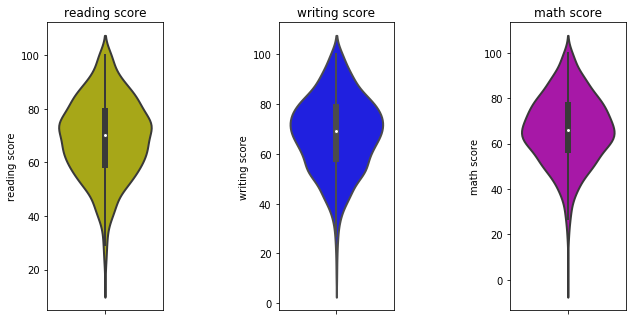

In [10]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.5, wspace=1, hspace=0.2)
plt.subplot(141)
plt.title('reading score')
sns.violinplot(y='reading score',data=df,color='y',linewidth=2)
plt.subplot(142)
plt.title('writing score')
sns.violinplot(y='writing score',data=df,color='b',linewidth=2)
plt.subplot(143)
plt.title('math score')
sns.violinplot(y='math score',data=df,color='m',linewidth=2)
plt.show()



We can observe here that maximium number of students scored marks between 60-80 in all three subjects


Relations with other variables like race,gender,lunch.parental level of education

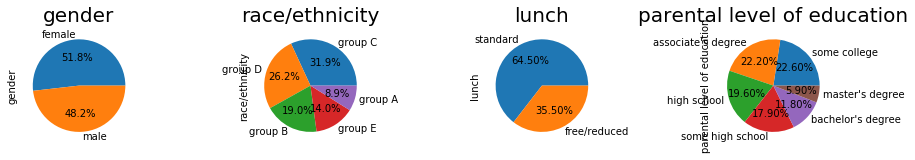

In [11]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.5, wspace=1, hspace=0.2)
plt.subplot(141)
plt.title('gender',fontsize= 20) #gender proportion in pie chart
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(142)
plt.title('race/ethnicity',fontsize= 20) #ethinicity pie chart
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143) 
plt.title('lunch',fontsize= 20)
df['lunch'].value_counts().plot.pie(autopct="%1.2f%%")

plt.subplot(144)
plt.title('parental level of education',fontsize= 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()



observarion

1.Percentage of male and females are almost same

2.No.of students belongs to group C and D are more compared with others

3.Most of the students are having standard lunch ,which is good.

4.Higher no.of student's parental level of education from same college or associate college

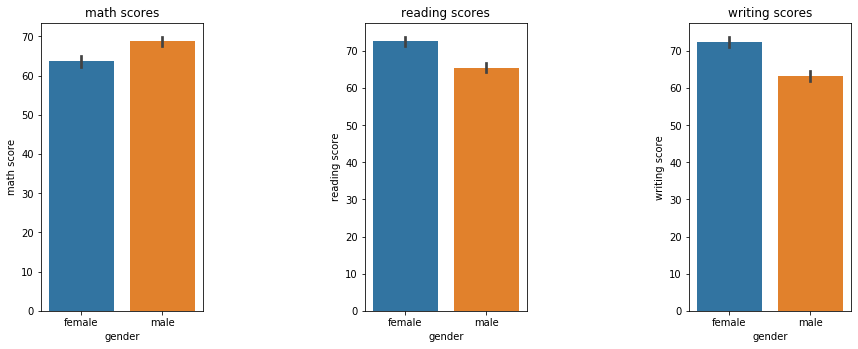

In [12]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.5, wspace=1, hspace=0.2)
plt.subplot(131)
plt.title('math scores')
sns.barplot(x="gender",y="math score",data=df)

plt.subplot(132)
plt.title('reading scores')
sns.barplot(x="gender",y="reading score",data=df)

plt.subplot(133)
plt.title('writing scores')
sns.barplot(x="gender",y="writing score",data=df)
plt.show()

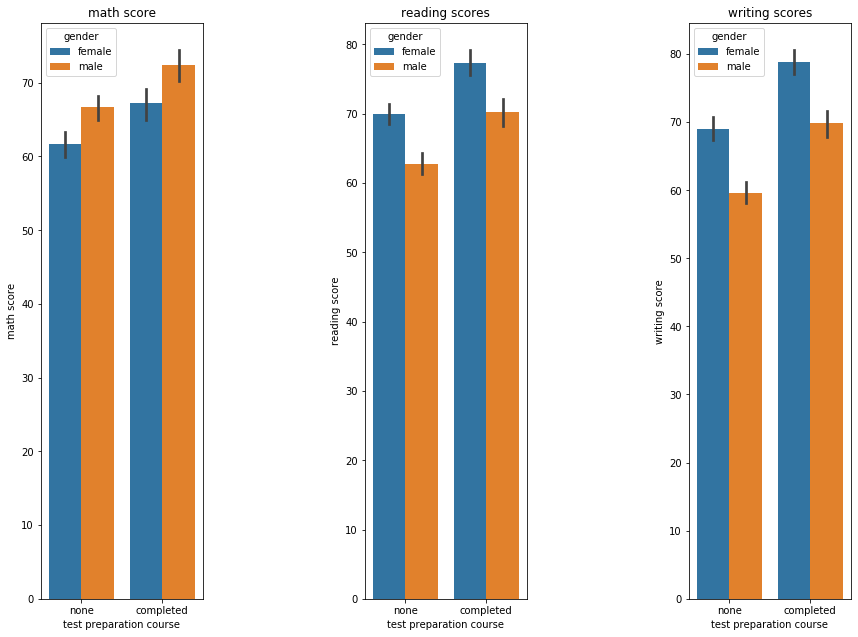

In [13]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.5, wspace=1, hspace=0.2)
plt.subplot(131)
plt.title('math score')
sns.barplot(y="math score", x="test preparation course" ,hue="gender", data=df)

plt.subplot(132)
plt.title('reading scores')
sns.barplot(x="test preparation course",y="reading score", hue="gender",data=df)

plt.subplot(133)
plt.title('writing scores')
sns.barplot(x="test preparation course",y="writing score",hue="gender",data=df)
plt.show()

Here both male and female students who completed test preparation course scored higher marks in all 3 subjects

Now we will see the score of the students of different groups who has completed test preparation course.

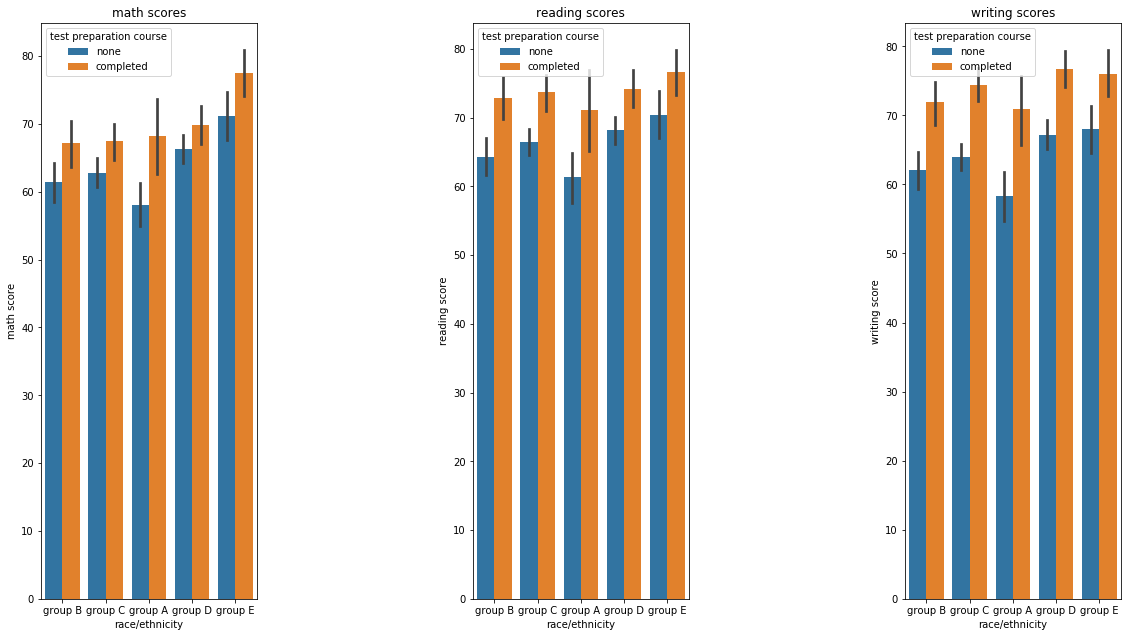

In [14]:
plt.figure(figsize=(40,20))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.5, wspace=1, hspace=0.3)

plt.subplot(131)
plt.title('math scores')
sns.barplot(x="race/ethnicity",y="math score", hue="test preparation course" , data=df)

plt.subplot(132)
plt.title('reading scores')
sns.barplot(x="race/ethnicity",y="reading score", hue="test preparation course",data=df)

plt.subplot(133)
plt.title('writing scores')
sns.barplot(x="race/ethnicity",y="writing score",hue="test preparation course",data=df)
plt.show()

Observation
1.Math score-higher no.of students who belong to group E have completed their test preparation course 

2.Reading score-higher no.of students who belong to group B,C,D,E have completed their test preparation course

3.Writing score-higher no.of students who belong to group D, E have completed their test preparation course 


Now lets analyse the relation between test preparation course and other variables.

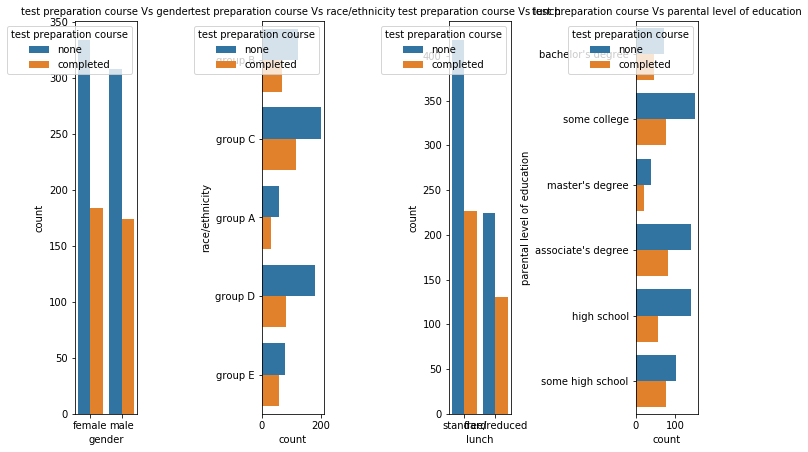

In [15]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.5, top=0.9, wspace=2, hspace=0.2)

plt.subplot(251)
plt.title('test preparation course Vs gender',fontsize= 10)
sns.countplot(x="gender", hue="test preparation course" , data=df)

plt.subplot(252)
plt.title('test preparation course Vs race/ethnicity',fontsize= 10)
sns.countplot(y="race/ethnicity", hue="test preparation course",data=df)

plt.subplot(253)
plt.title('test preparation course Vs lunch' ,fontsize= 10)
sns.countplot(x="lunch",hue="test preparation course",data=df)

plt.subplot(254)
plt.title('test preparation course Vs parental level of education', fontsize= 10)
sns.countplot(y= "parental level of education", hue="test preparation course",data=df)

plt.show()

OBSERVATION



1.Most of the female students have completed  test preparation course

2.Group c studects  have mostly completed test preparation course .

3.Standard lunch students have completed test preparation course 

4.Students belong to same college mostly completed  their test preparation course 
 
Now lets look into the graph of gender vs ethicity and other variable graphs

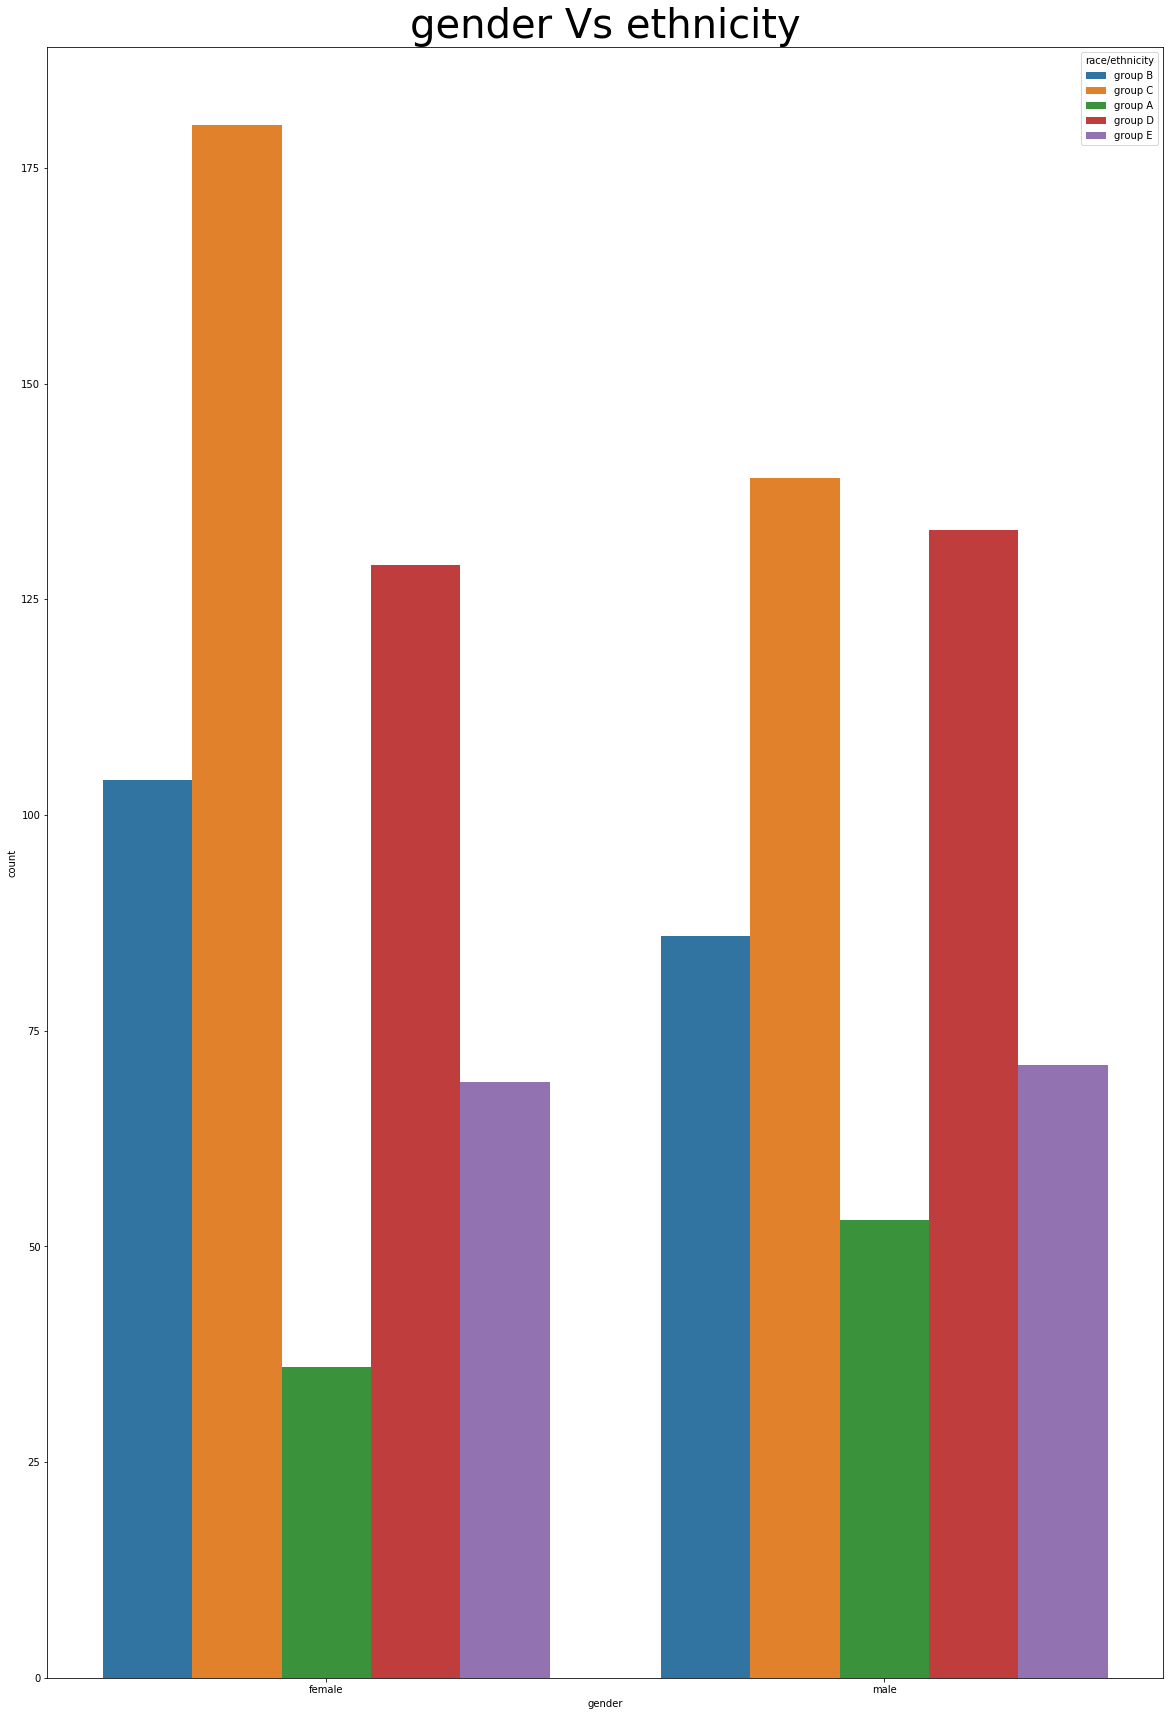

In [16]:
plt.title('gender Vs ethnicity',fontsize=40)
sns.countplot(x="gender",hue ="race/ethnicity",data=df)
plt.show()

most of the females and male students belongs to ethnicity groupC followed by group D



lets look at the race vs lunch graph

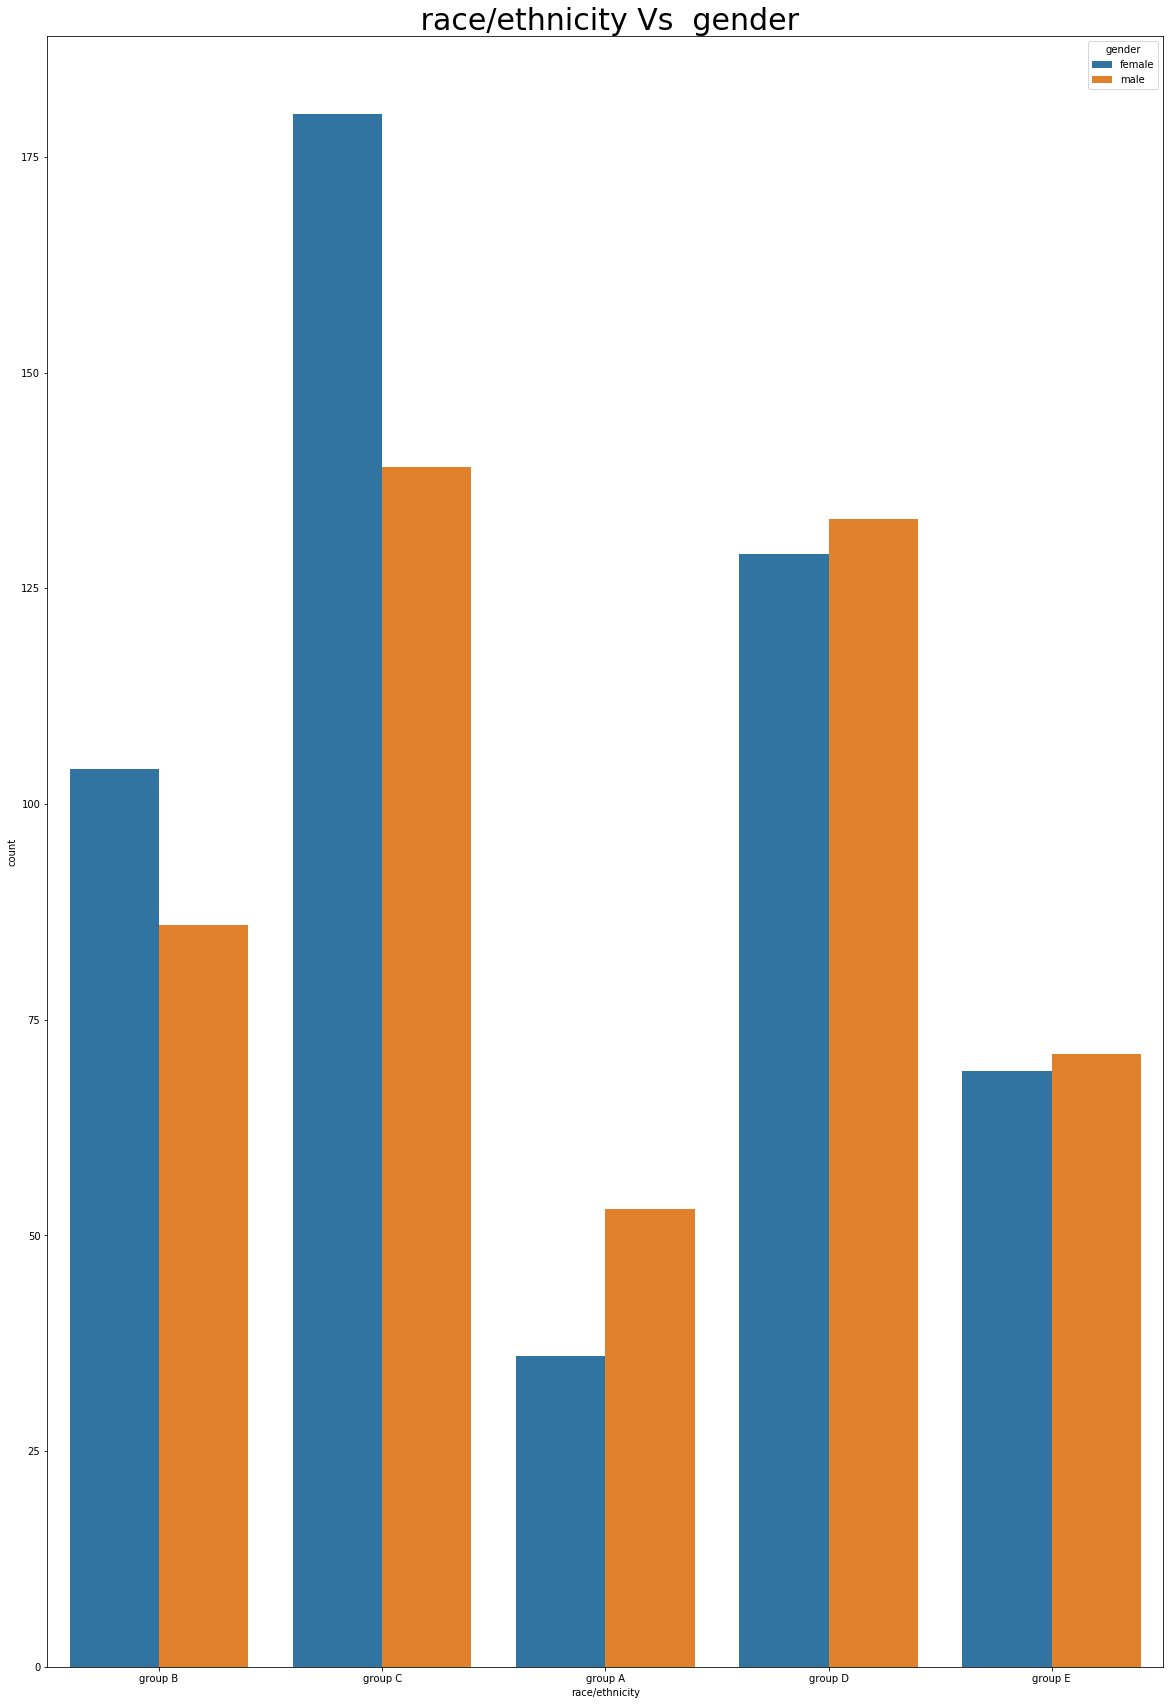

In [17]:
plt.title(' race/ethnicity Vs  gender',fontsize=30)
sns.countplot(x="race/ethnicity",hue= "gender",data=df)
plt.show()

most of the females belong to group C

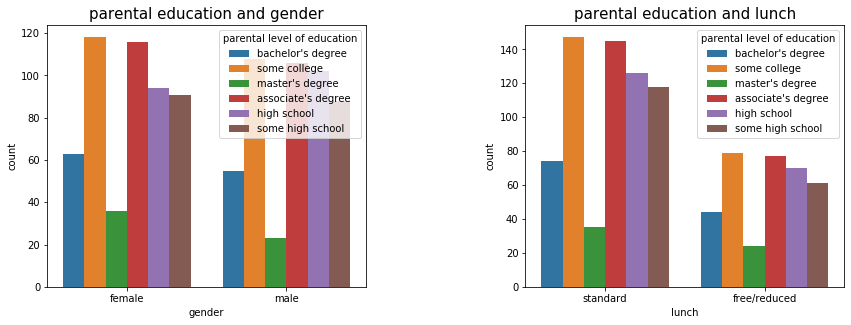

In [18]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(251)
plt.title('parental education and gender',fontsize= 15)
sns.countplot(x="gender", hue="parental level of education" , data=df)

plt.subplot(252)
plt.title('parental education and lunch',fontsize= 15)
sns.countplot(x="lunch", hue="parental level of education" , data=df)
plt.show()

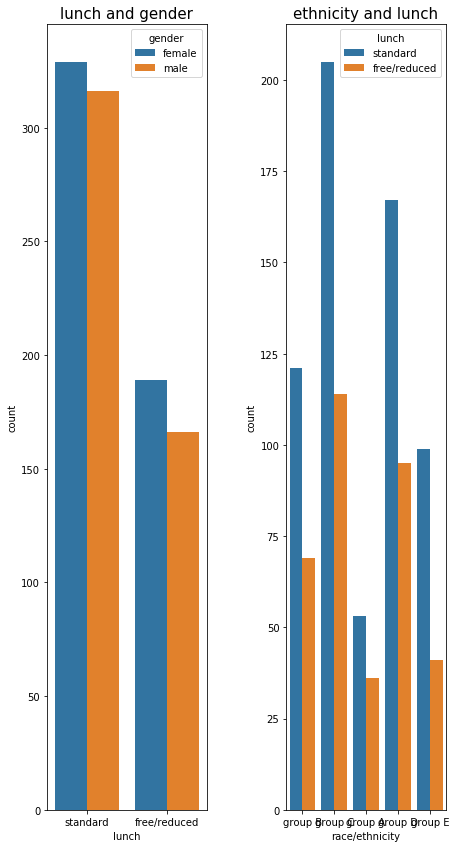

In [19]:
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(251)
plt.title('lunch and gender',fontsize= 15)
sns.countplot(x="lunch", hue="gender" , data=df)

plt.subplot(252)
plt.title('ethnicity and lunch',fontsize= 15)
sns.countplot(x="race/ethnicity", hue="lunch" , data=df)
plt.show()


now to analyse the data in deep we have to take more columns like total marks,percentage,grades

In [20]:
df['total marks']=df['math score']+df['reading score']+df['writing score']
df['percentage']=df['total marks']*100/300

print(df['total marks'])
print(df['percentage'])



0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total marks, Length: 1000, dtype: int64
0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: percentage, Length: 1000, dtype: float64


now lets assign grades.

criteria for grades are as follows :

1.85-100:GradeA

2.70-84:GradeB

3.55-69:GradeC

4.35-54:GradeD

5.0-35:GradeE






In [21]:
#Assigning the grades

def determine_grade (scores): 
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)
    
    
    
    


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total marks                  1000 non-null   int64  
 9   percentage                   1000 non-null   float64
 10  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


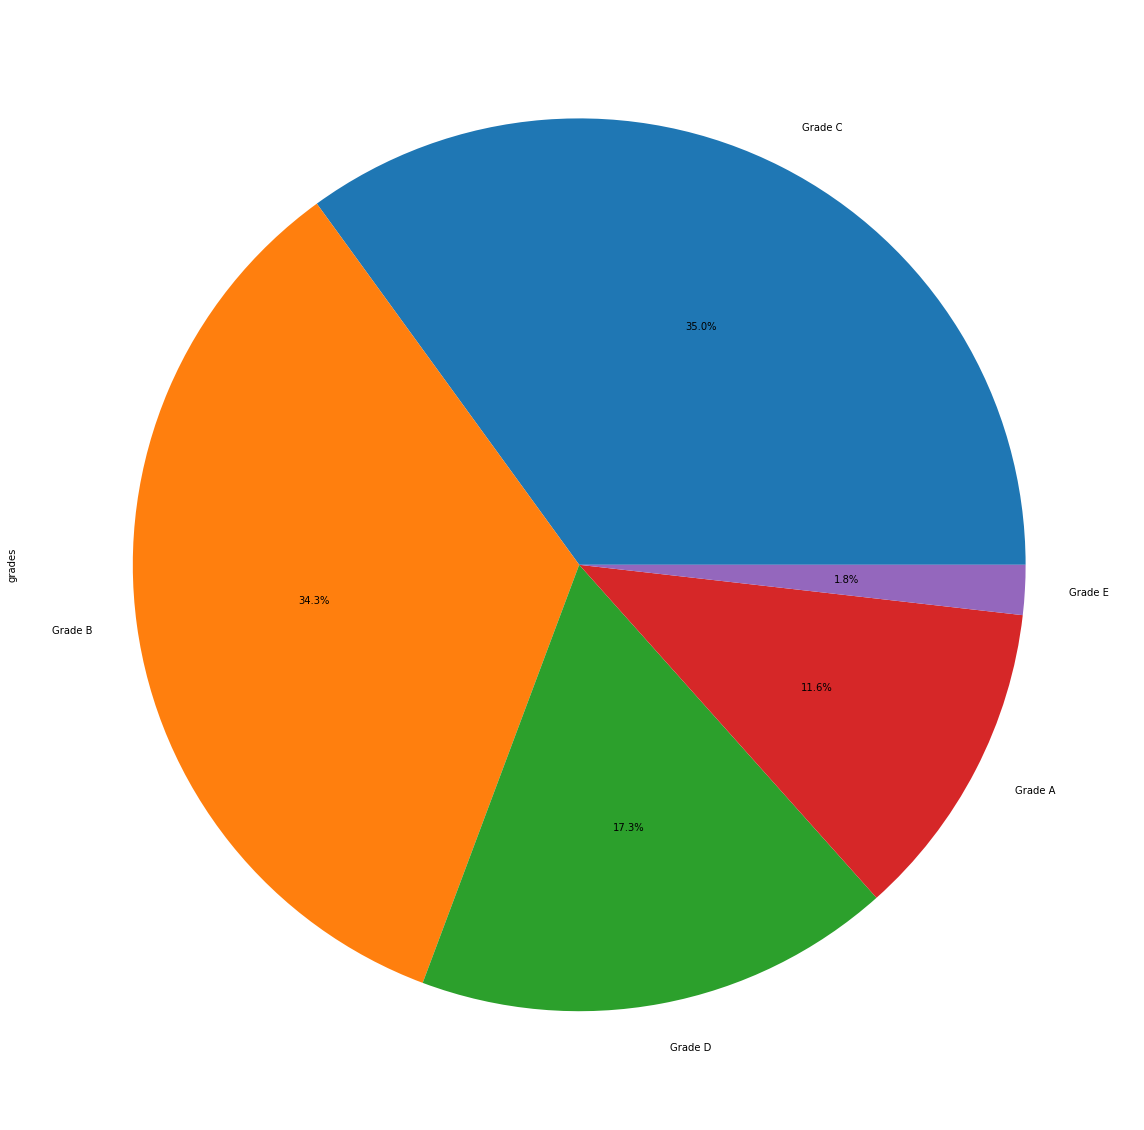

In [23]:
df['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In this piegraph grade C and B is scored by more no.of students

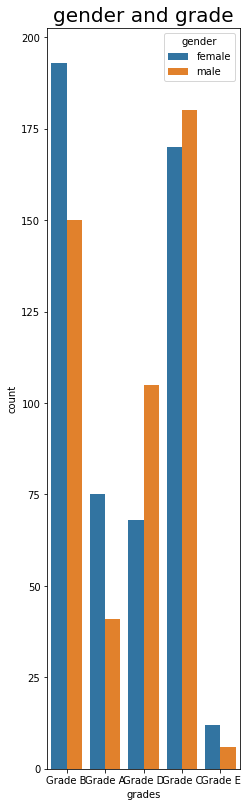

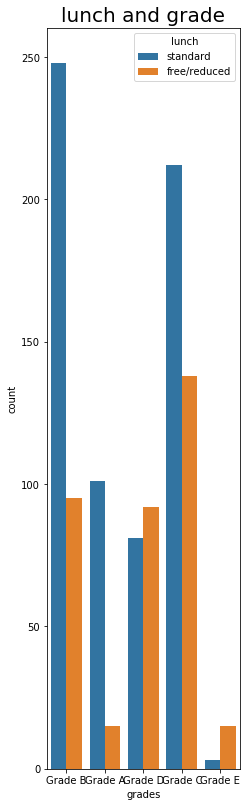

In [24]:
plt.subplot(251)
plt.title('gender and grade',fontsize=20)
sns.countplot(x="grades",hue="gender",data=df)                        
plt.show()

plt.subplot(252)
plt.title('lunch and grade',fontsize=20)
sns.countplot(x="grades",hue="lunch",data=df)                        
plt.show()

In 1st graph most no. of students getting grade B
we can observe in above graph most of the students having standard lunch have good grades

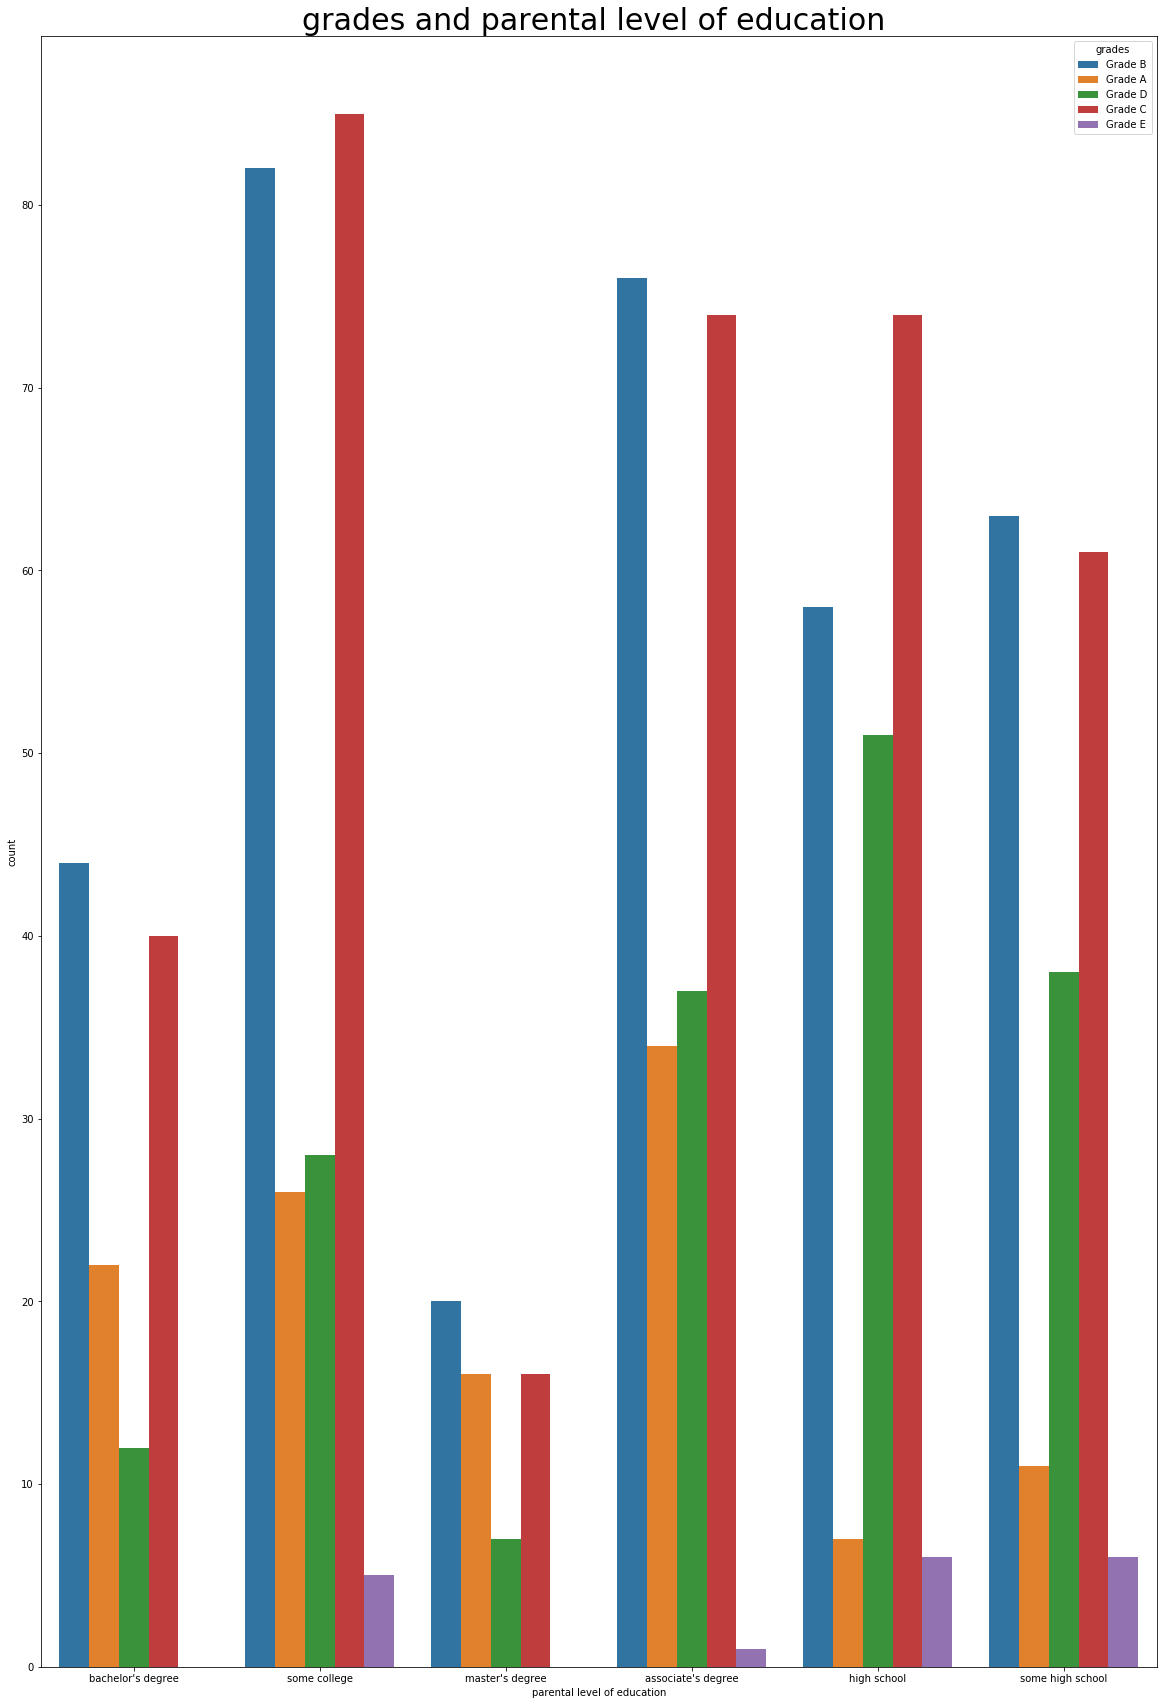

In [25]:
plt.title('grades and parental level of education ',fontsize=30)
sns.countplot(x="parental level of education",hue="grades",data=df)                        
plt.show()


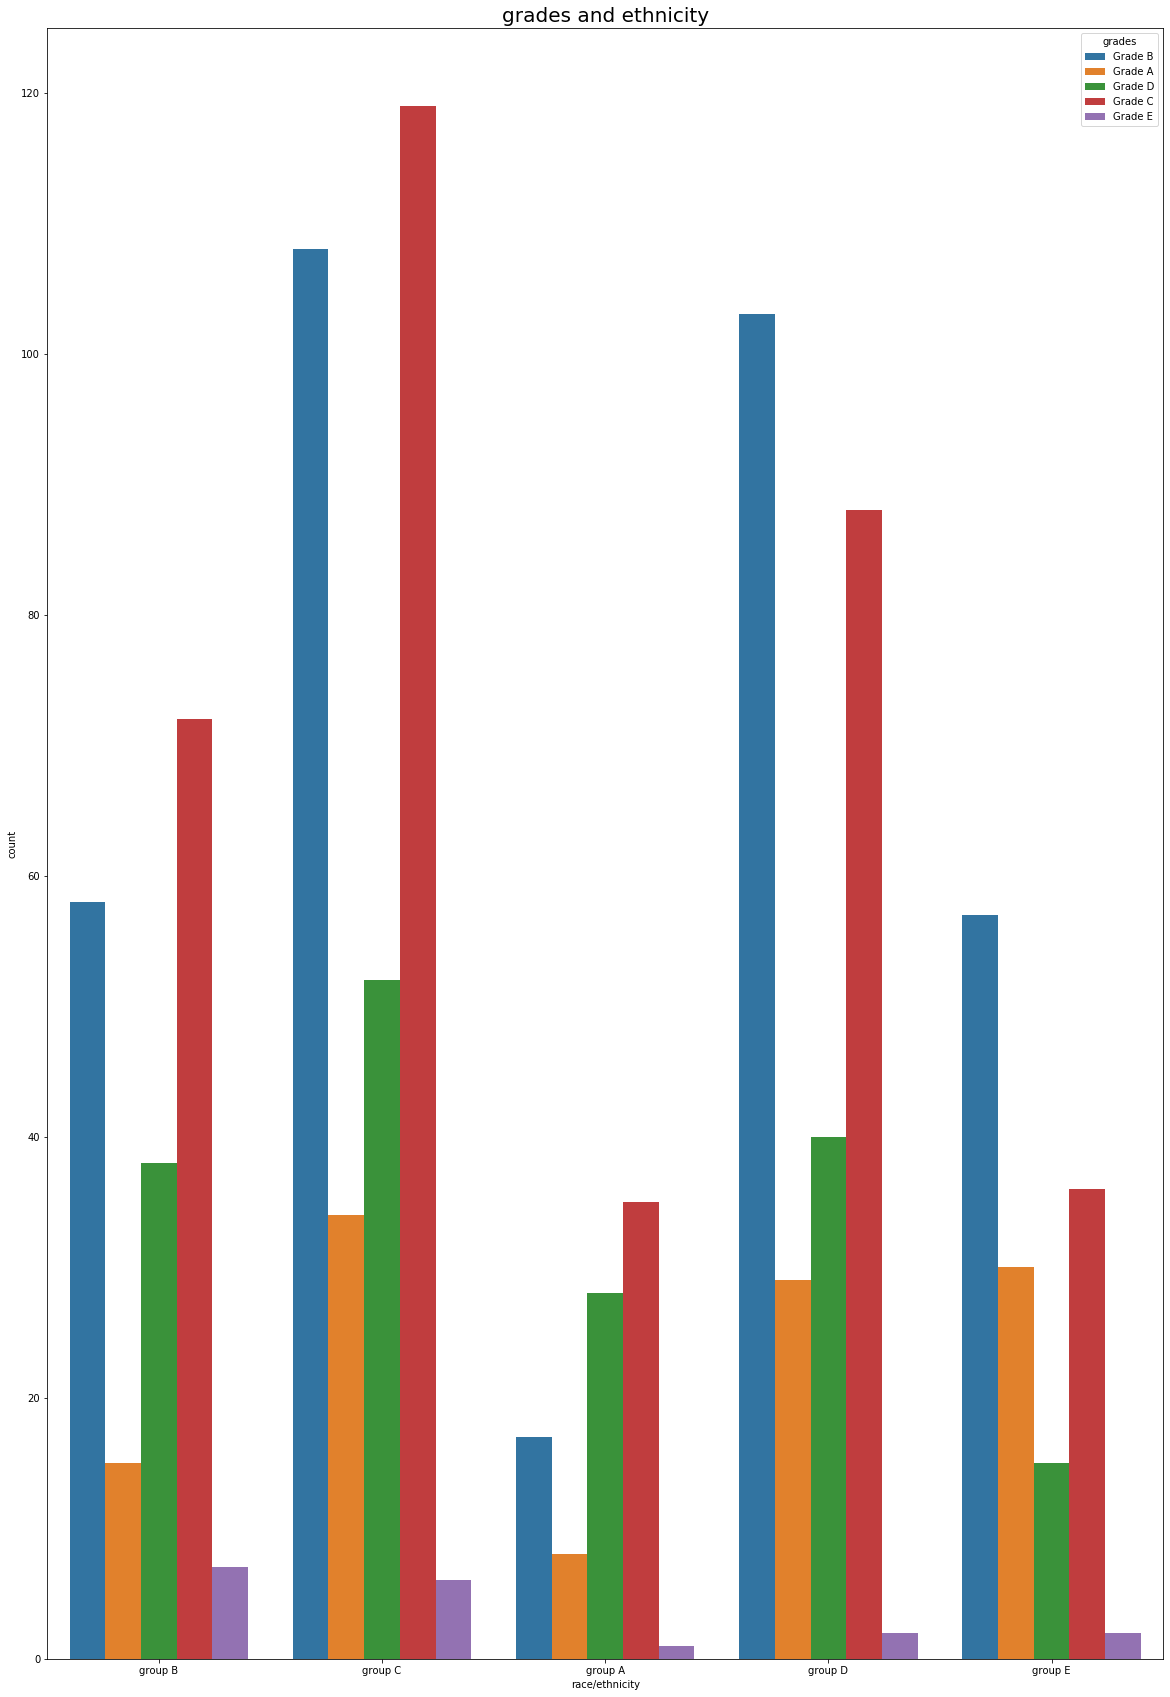

In [26]:
plt.title('grades and ethnicity',fontsize=20)
sns.countplot(x="race/ethnicity",hue="grades",data=df)                        
plt.show()

In this graph we observe that in group C,A ,grade C is scored by most no. of students and in very less no.of students scored grade E in all ethnicities.